# Part 5: Display Geolocation of Clicks with vaex

In [2]:
import vaex
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_rows = 150

In [29]:
filename = '..\\data\\2018_clicked.hdf5'

Open vaex dataframe and remove all columns who do not have 'click' in their name.

In [30]:
df = vaex.open(filename)

In [32]:
colnames = [name for name in df.columns.keys() if not 'click' in name]
df.drop(colnames, inplace = True)
df.head()

#,click_Link_Id,click_Link_Category_Id,click_GeoLocation_Latitude,click_GeoLocation_Longitude
0,32,0,39.7795,-86.1328
1,32,0,-27,133
2,8,0,51,9
3,8,0,51,9
4,8,0,51,9
5,8,0,49.0167,12.1833
6,8,0,51,9
7,8,0,50.5833,8.64999
8,32,0,49.015,12.0956
9,3,0,48.9333,12.05


### Plot the Geo Locations of all newsletter clicks

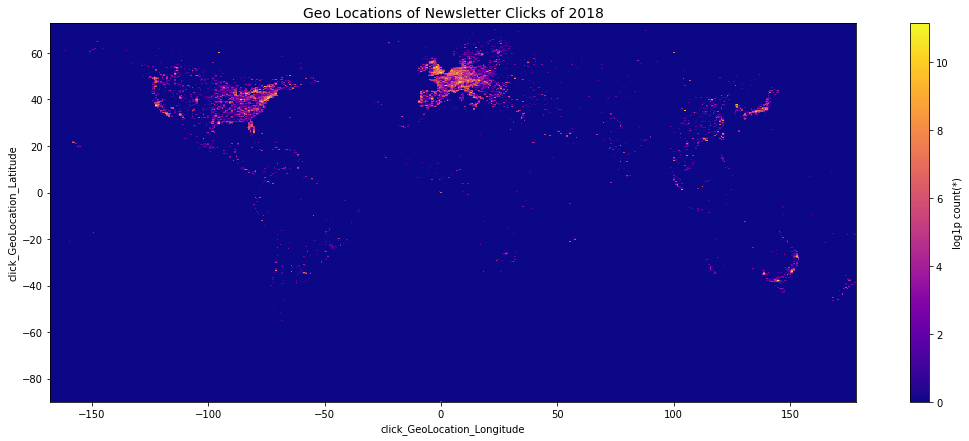

In [36]:
df.plot(df['click.GeoLocation.Longitude'], 
               df['click.GeoLocation.Latitude'],
                shape=512, 
               limits='minmax',
               f='log1p', 
               colormap='plasma', figsize=(15,6))

plt.axis('scaled')
plt.title('Geo Locations of Newsletter Clicks of 2018', fontsize=14);

### Zoom into Europe

After a first zoom into Europe, I saw that there are concetraions in some locations, and suspected that these were some big cities in europe. Thus, I downloaded a file with the geo locations of the world's biggest cities and made a selection by latitude and longitude and took only the ones with a population over 1 million.

After a first plot, I saw that the most highlighted cities were London, Paris, Milan and Zurich, and reduced the selection only to those, to display them in the plot.

In [38]:
cities = pd.read_csv('..\\data\\worldcities.csv')

cities = cities[(cities['lat'] > 30) & 
                 (cities['lat'] < 60) &
                 (cities['lng'] > -10) & 
                 (cities['lng'] < 20) & (cities.population > 1e6)]
cities = cities[cities.city.isin(['London', 'Paris', 'Milan', 'Zürich'])]
cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
19,Paris,Paris,48.8667,2.3333,France,FR,FRA,Île-de-France,primary,9904000.0,1250015082
25,London,London,51.5000,-0.1167,United Kingdom,GB,GBR,"London, City of",primary,8567000.0,1826645935
120,Milan,Milan,45.4700,9.2050,Italy,IT,ITA,Lombardy,admin,2945000.0,1380724377
434,Zürich,Zurich,47.3800,8.5500,Switzerland,CH,CHE,Zürich,admin,1108000.0,1756539143


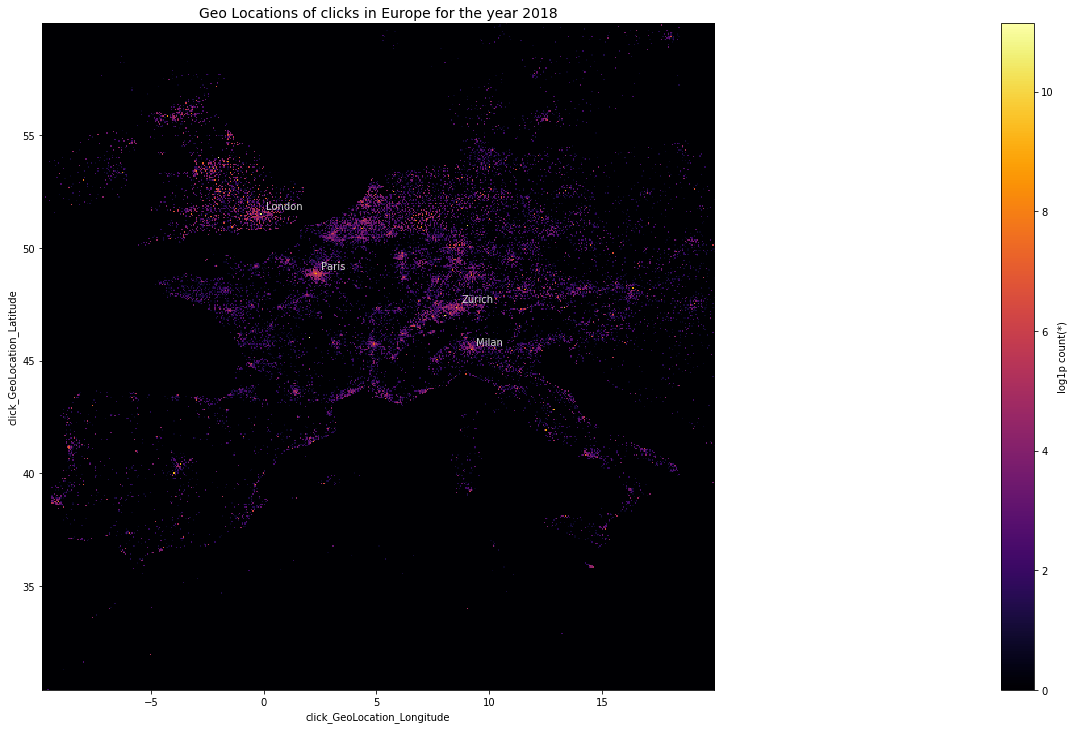

In [45]:
df_filtered = df[(df['click.GeoLocation.Latitude'] > 30) & 
                 (df['click.GeoLocation.Latitude'] < 60) &
                 (df['click.GeoLocation.Longitude'] > -10) & 
                 (df['click.GeoLocation.Longitude'] < 20)]
df_filtered.plot(df['click.GeoLocation.Longitude'], 
               df['click.GeoLocation.Latitude'],
                shape=512, 
               limits='minmax',
               f='log1p', 
               colormap='inferno', figsize=(20,10))

#plt.scatter(cities.lng, cities.lat, s=100)
for i,row in cities.iterrows():
    plt.annotate(row['city'], (row.lng+0.2, row.lat+0.2), c='lightgray')
                 
plt.axis('scaled');
plt.title('Geo Locations of clicks in Europe for the year 2018', fontsize=14);